Importing libraries

In [125]:
import numpy as np
from pylab import meshgrid,cm,imshow,show
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

Initializing variables

In [126]:
nParticles = 10
vmin = -0.5
vmax = 0.5
vx = np.random.uniform(vmin, vmax, nParticles)
vy = np.random.uniform(vmin, vmax, nParticles)
t = 1

vx, vy

(array([-0.16348254,  0.38871898, -0.25587692,  0.05966878, -0.32027707,
         0.18537111, -0.22060543,  0.26878952, -0.19773415, -0.15650765]),
 array([-0.37574916, -0.23890462,  0.42936804, -0.00480099,  0.41770525,
         0.16022295, -0.00814313, -0.34835111, -0.06744587,  0.47754407]))

Defining the function $f(x,y)=(1-x)^2+100(y-x^2)^2$

In [127]:
def f(x, y):
    return (1-x)**2 + 100*(y-(x**2))**2

Initializing 21 pair random particles betwen the range -5, 5

In [128]:
positions = np.random.uniform(-5, 5, ((nParticles, 2)))
positions

array([[-0.90481669,  1.88376487],
       [ 2.36793609, -1.75669889],
       [-4.61198348,  3.83372783],
       [-2.34526643, -1.29569475],
       [-1.12298913, -4.67268983],
       [-1.53969177, -3.91118926],
       [ 4.89367596,  2.48641193],
       [ 1.03924268, -4.54790144],
       [ 1.91771341, -4.34584673],
       [-0.08490905,  1.22342202]])

In [129]:
bestPos = positions #making the pre-loop best individual positions same as positions

In [130]:
max_it = 500 #Initializing the max number of iterations

Main loop

In [131]:
evalPos = np.array([int(f(positions[particle, 0], positions[particle, 1])) for particle in range(nParticles)]) #gettig the pre-loop particles performances
#print(f"Initial performance: {evalPos}")
#print(f"Initial mean performance: {np.mean(evalPos)}")

#fResult = []
minResults = []
meanResults = []

while t<max_it:

    fi1 = np.random.uniform(0, 2.05, nParticles) #generating the fi1 random values vector
    fi2 = np.random.uniform(0, 2.05, nParticles) #generating the fi2 random values vector

    for particle in range(nParticles): #for each particle

        evalPos = f(positions[particle, 0], positions[particle, 1]) #getting each particle performance
        evalBestPos = f(bestPos[particle, 0], bestPos[particle, 1]) #getting each best particle performance

        if evalPos < evalBestPos: #if position performance is better than their best performance 
            bestPos[particle] = positions[particle] #update best position

        bestNeigIndx = particle #make current particle the best neighbour
        neigIndices = [particle-1, particle+1] #getting neighbours indices

        for neighbour in range(len(neigIndices)): #for each neighbour

            neigPos = np.take(bestPos, neigIndices[neighbour], mode='wrap', axis=0) #take neighbours best positions
            evalBestNeigPos = f(neigPos[0], neigPos[1]) #getting each best neighbour performance
            evalBestGerPos = f(positions[bestNeigIndx, 0], positions[bestNeigIndx, 1]) #getting best general performance

            if evalBestNeigPos < evalBestGerPos: #if best neighbour performance is better than best general performance
                
                if neigIndices[neighbour] == nParticles: #avoid unbounds
                    bestNeigIndx = 0
                else:
                    bestNeigIndx = neigIndices[neighbour] #update best neighbour index

        vx[particle] = vx[particle] + fi1[particle] * (bestPos[particle, 0]-positions[particle, 0]) \
                        + fi2[particle] * (bestPos[bestNeigIndx, 0]-positions[particle, 0]) #updating velocity

        if vx[particle] > vmax: #limitating max velocity
            vx[particle] = vmax

        if vx[particle] < vmin: #limitating min velocity
            vx[particle] = vmin

        vy[particle] = vy[particle] + fi1[particle] * (bestPos[particle, 1]-positions[particle, 1]) \
                        + fi2[particle] * (bestPos[bestNeigIndx, 1]-positions[particle, 1]) #updating velocity

        if vy[particle] > vmax: #limitating max velocity
            vy[particle] = vmax

        if vy[particle] < vmin: #limitating min velocity
            vy[particle] = vmin

        positions[particle, 0] = positions[particle, 0] + vx[particle] #updating x coordinate
        positions[particle, 1] = positions[particle, 1] + vy[particle] #updating y coordinate

    evalPos = np.array([int(f(positions[particle, 0], positions[particle, 1])) for particle in range(len(positions))])
    minResults.append(np.min(evalPos)) #appending each iteration mean performance 
    meanResults.append(np.mean(evalPos))

    t+=1

print()
print()

Text(0, 0.5, 'Mean')

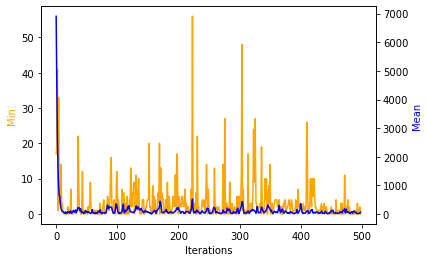

In [153]:
x = [result for result in range(len(minResults))]
y2 = [result for result in minResults]
y1 = [result for result in meanResults]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y2, 'orange')
ax2.plot(x, y1, 'blue')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Min', color='orange')
ax2.set_ylabel('Mean', color='blue')

Text(0, 0.5, 'y')

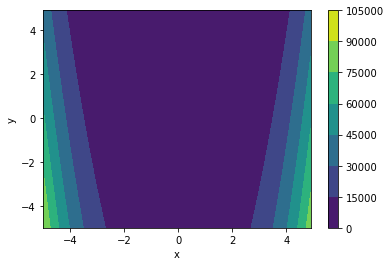

In [133]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#plt.show()

[[ 0.47733662  0.56996244]
 [-0.78594531 -0.53157136]
 [ 0.58398114  0.55805377]
 [ 0.03303281 -0.08857464]
 [ 0.43292843  0.23044212]
 [ 0.9490291   0.82414424]
 [ 1.33157313  1.05606809]
 [ 1.60349467  0.96841587]
 [ 1.29850753  0.28535534]
 [ 0.6389248   0.05096428]]


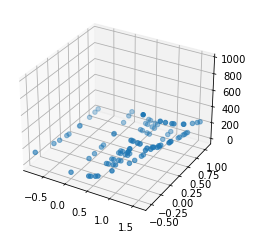

In [134]:
print(positions)

x = [position[0] for position in positions]
y = [position[1] for position in positions]
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z)